

# KMEANS




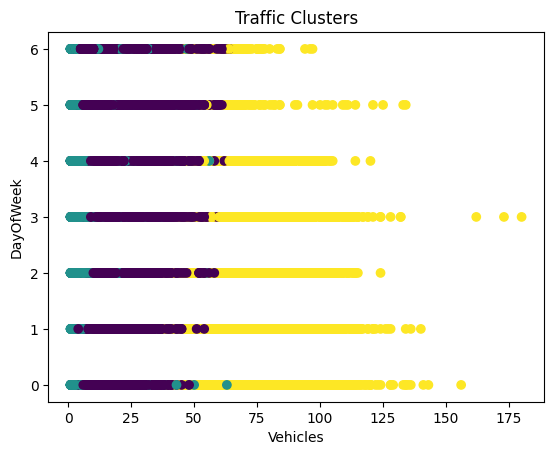

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("traffic.csv")

df['Hour'] = pd.to_datetime(df['DateTime']).dt.hour
df['DayOfWeek'] = pd.to_datetime(df['DateTime']).dt.dayofweek
features = df[['Hour', 'DayOfWeek', 'Junction', 'Vehicles']]

# Standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means

kmeans = KMeans(n_clusters=3, random_state= 42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualization
plt.scatter(df['Vehicles'], df['DayOfWeek'], c=df['Cluster'], cmap='viridis')
plt.xlabel("Vehicles")
plt.ylabel("DayOfWeek")
plt.title("Traffic Clusters")
plt.show()


In [ ]:
print(scaled_features)

[[-1.66132477  1.501998   -1.22090527 -0.37548875]
 [-1.51686175  1.501998   -1.22090527 -0.47187501]
 [-1.37239873  1.501998   -1.22090527 -0.61645439]
 ...
 [ 1.37239873  0.50199601  1.88164868 -0.32729563]
 [ 1.51686175  0.50199601  1.88164868 -0.03813687]
 [ 1.66132477  0.50199601  1.88164868 -0.52006813]]


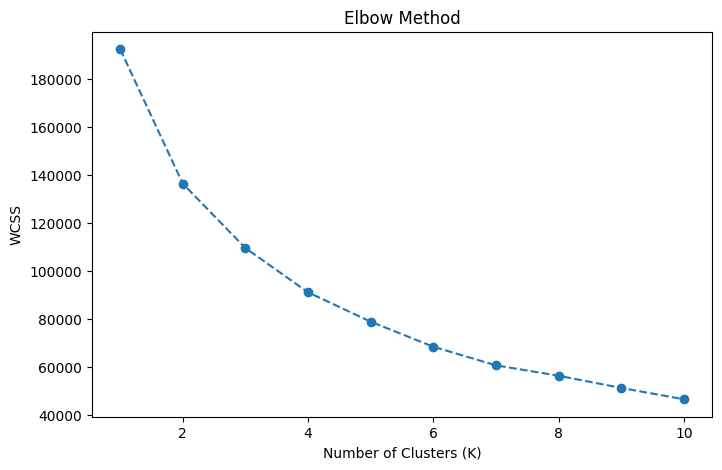

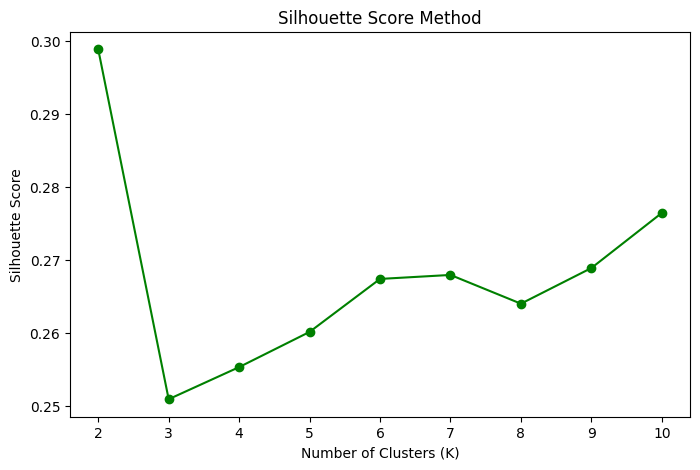

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = pd.read_csv("traffic.csv")

# Feature engineering
df['Hour'] = pd.to_datetime(df['DateTime']).dt.hour
df['DayOfWeek'] = pd.to_datetime(df['DateTime']).dt.dayofweek
features = df[['Hour', 'DayOfWeek', 'Junction', 'Vehicles']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method
wcss = []
K_range = range(1, 11)  # Test K from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # WCSS for each K

# Ploting
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()





# Silhouette Scores
silhouette_scores = []
for k in range(2, 11):  # Silhouette is undefined for K=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='green')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


# DBSCAN

In [ ]:
# Select relevant features
features = df[['Hour', 'DayOfWeek', 'Junction', 'Vehicles']]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


Number of clusters: 4
Number of noise points: 9
Silhouette Score: 0.1366055563079769


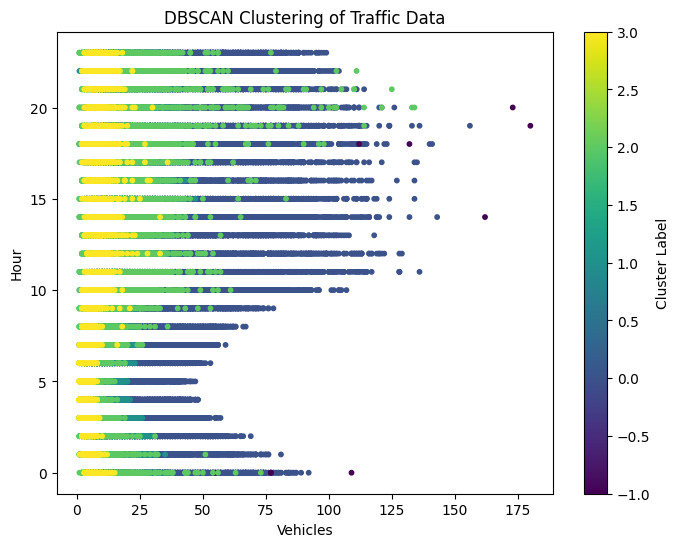

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# DBSCAN parameters

eps = 1  #
min_samples = 6

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
clusters = dbscan.fit_predict(scaled_features)

# Add cluster labels to the dataset
df['Cluster'] = clusters

# Evaluate clustering
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Exclude noise (-1)
n_noise = list(clusters).count(-1)
silhouette_avg = silhouette_score(scaled_features, clusters) if n_clusters > 1 else None

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")
if silhouette_avg is not None:
    print(f"Silhouette Score: {silhouette_avg}")

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Vehicles'], df['Hour'], c=df['Cluster'], cmap='viridis', s=10)
plt.colorbar(label='Cluster Label')
plt.xlabel('Vehicles')
plt.ylabel('Hour')
plt.title('DBSCAN Clustering of Traffic Data')
plt.show()

In [ ]:
scaled_features

array([[-1.66132477,  1.501998  , -1.22090527, -0.37548875],
       [-1.51686175,  1.501998  , -1.22090527, -0.47187501],
       [-1.37239873,  1.501998  , -1.22090527, -0.61645439],
       ...,
       [ 1.37239873,  0.50199601,  1.88164868, -0.32729563],
       [ 1.51686175,  0.50199601,  1.88164868, -0.03813687],
       [ 1.66132477,  0.50199601,  1.88164868, -0.52006813]])